In [62]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 21.0MB/s]


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [65]:
df.shape

(440, 8)

In [66]:
df = pd.get_dummies(df,columns= ['Region'])

#storing class labels

Y = df['class']

df = pd.get_dummies(df,columns=['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,False,False,True,False,True,False
1,7057,9810,9568,1762,3293,1776,False,False,True,False,True,False
2,6353,8808,7684,2405,3516,7844,False,False,True,False,True,False
3,13265,1196,4221,6404,507,1788,False,False,True,True,False,False
4,22615,5410,7198,3915,1777,5185,False,False,True,True,False,False


In [67]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#reducing to just 2 features for visualization

pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

In [69]:
df2 = pd.DataFrame(visual_1,columns=['f1','f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)

[0.45961362 0.40517227]


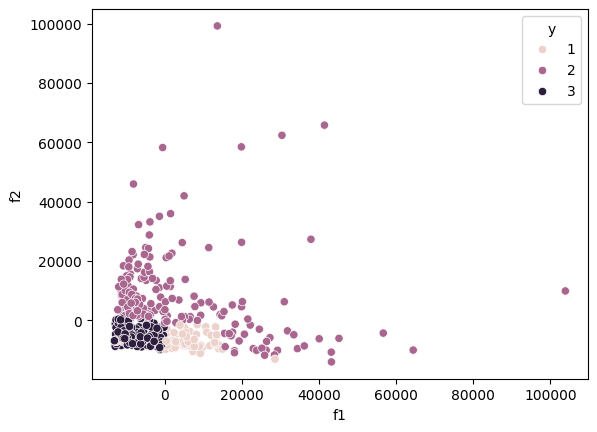

In [70]:
sns.scatterplot(data=df2,x='f1',y='f2',hue='y')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

X_train_val,X_test,y_train_val, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)


Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [73]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#For reproducibility

np.random.seed(42)
tf.random.set_seed(42)

In [74]:
def create_baseline():
  model = Sequential(
      [
          Dense(32, activation="relu", kernel_initializer='glorot_uniform'),
          Dense(64, activation="relu", kernel_initializer='glorot_uniform'),
          Dense(128, activation="relu", kernel_initializer='glorot_uniform'),
          Dense(64, activation="relu", kernel_initializer='glorot_uniform'),
          Dense(32, activation="relu", kernel_initializer='glorot_uniform'),
          Dense(3,activation='softmax')
      ]
  )
  return model

In [75]:
model = create_baseline()

In [76]:
X_train.shape

(356, 9)

In [77]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.CategoricalCrossentropy())

In [78]:
history = model.fit(X_train,y_train, validation_data= (X_val,y_val),epochs=10,batch_size=128)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - loss: 1.0853 - val_loss: 1.0716
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0798 - val_loss: 1.0653
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0745 - val_loss: 1.0589
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.0692 - val_loss: 1.0526
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.0640 - val_loss: 1.0463
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.0589 - val_loss: 1.0401
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.0538 - val_loss: 1.0341
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1.0488 - val_loss: 1.0282
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.0439 - val_loss: 1.0226
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 1.0392 - val_loss: 1.0171


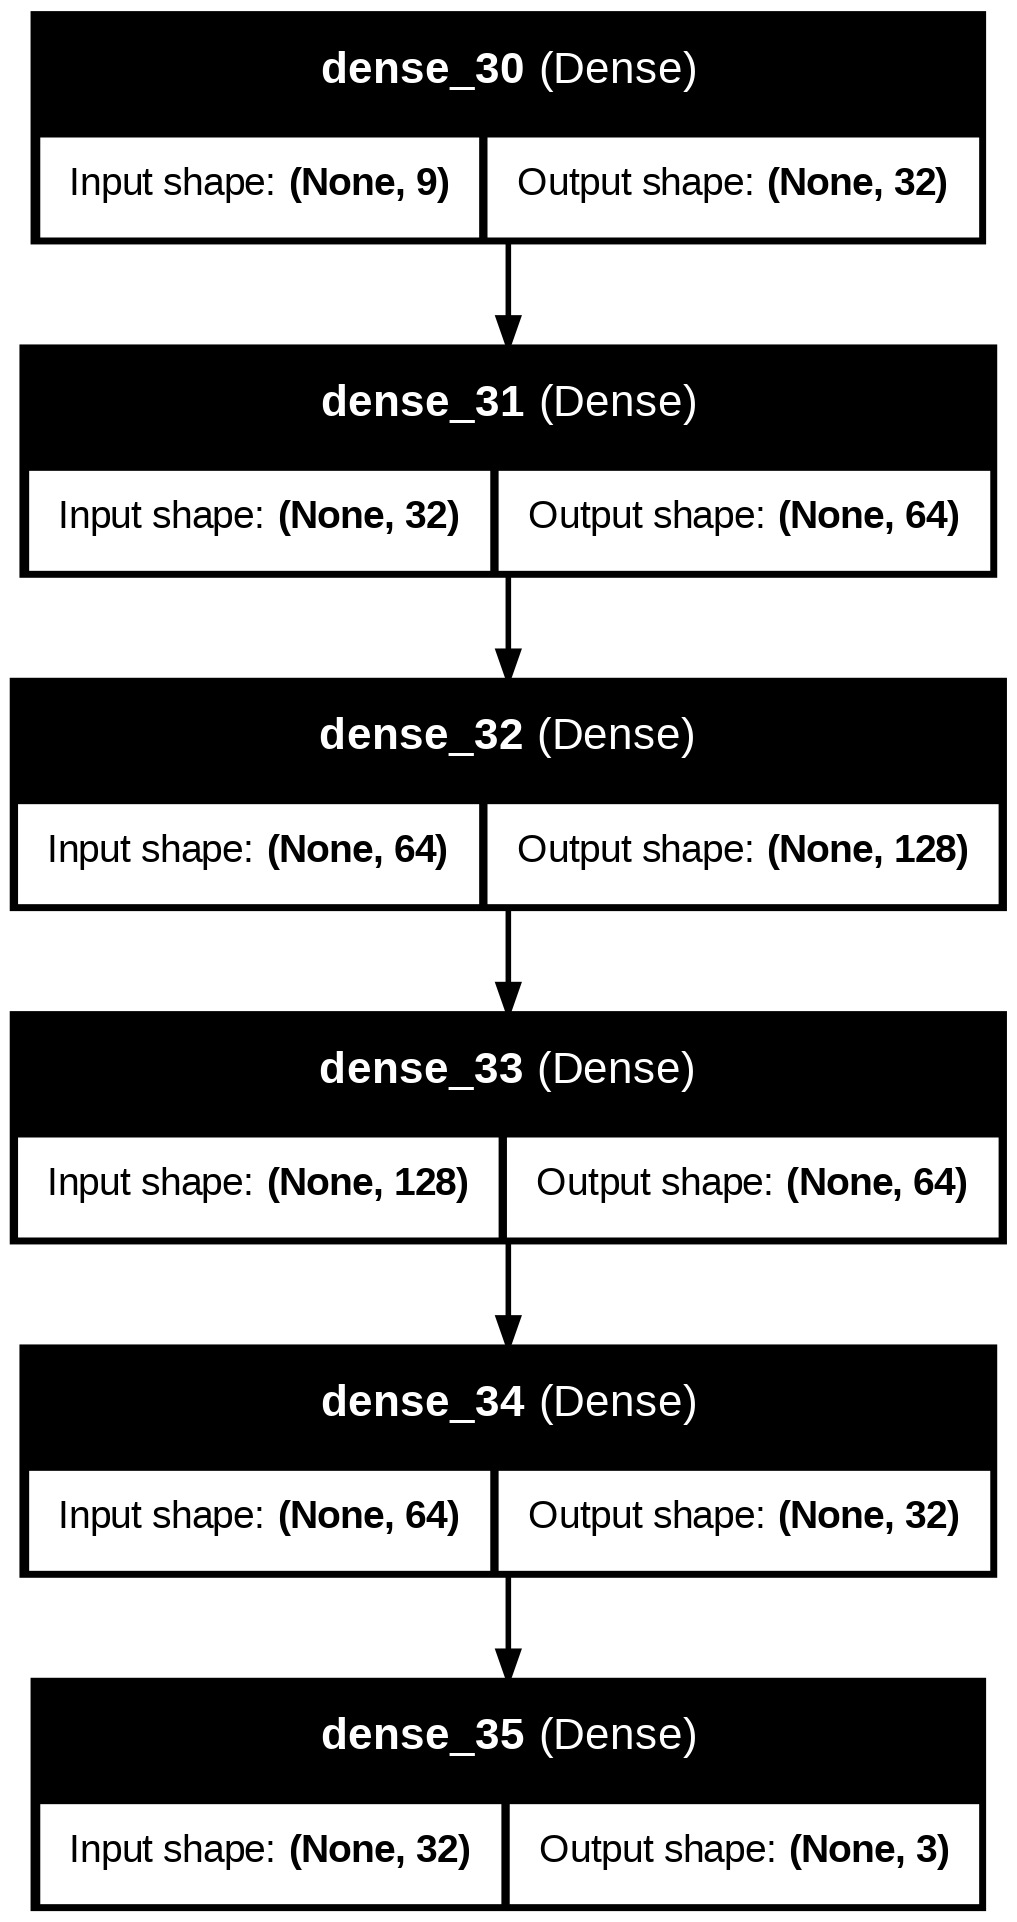

In [79]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True, show_layer_names=True)

In [80]:
def show_plot(history):
  epochs = history.epoch
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  plt.plot(epochs, loss, label="train")
  plt.plot(epochs, val_loss, label="validation")

  plt.legend()
  plt.title("Loss VS Epochs")

  plt.show()

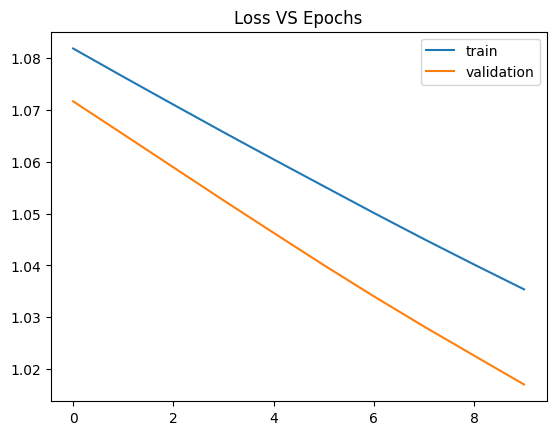

In [81]:
show_plot(history)

In [82]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 1.0345 - val_loss: 1.0116
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 1.0299 - val_loss: 1.0062
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.0254 - val_loss: 1.0008
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1.0209 - val_loss: 0.9954
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0165 - val_loss: 0.9901
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.0121 - val_loss: 0.9847
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.0078 - val_loss: 0.9793
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.0035 - val_loss: 0.9740
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.9991 - val_loss: 0.9687
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9947 - val_loss: 0.9634
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.9903 - val_loss: 0.9581
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.9859 - val

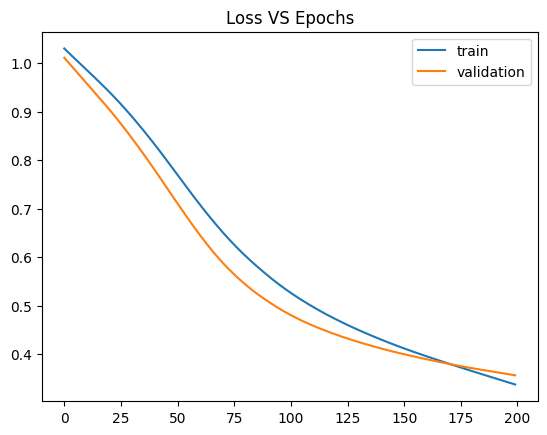

In [83]:
show_plot(history)

In [84]:
model_gdm = create_baseline()

model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )

In [85]:
history_gdm = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)

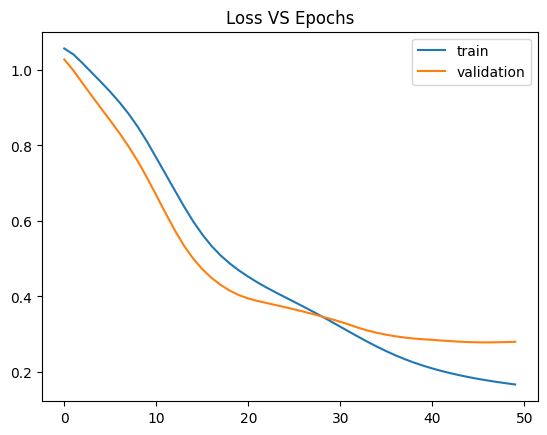

In [86]:
show_plot(history_gdm)

In [87]:
model_rms = create_baseline()

model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )

In [88]:
history_rms = model_rms.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


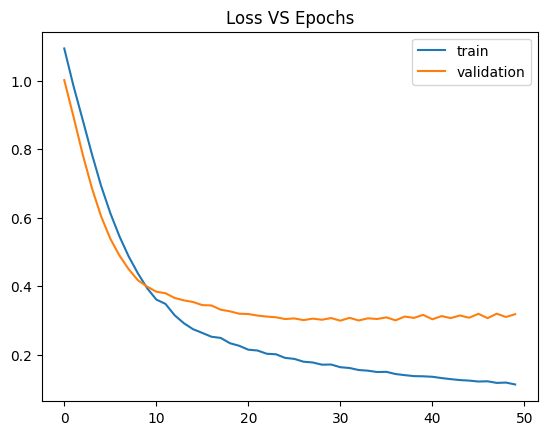

In [89]:
show_plot(history_rms)

In [91]:
model_adam = create_baseline()

model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy())

history_adam = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 1.0847 - val_loss: 1.0102
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0301 - val_loss: 0.9545
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9866 - val_loss: 0.9043
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9425 - val_loss: 0.8560
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8938 - val_loss: 0.8023
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.8404 - val_loss: 0.7452
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7817 - val_loss: 0.6851
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7185 - val_loss: 0.6218
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6525 - val_loss: 0.5551
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5827 - val_loss: 0.4894
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5123 - val_loss: 0.4344
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4459 - val_loss: 0.3959


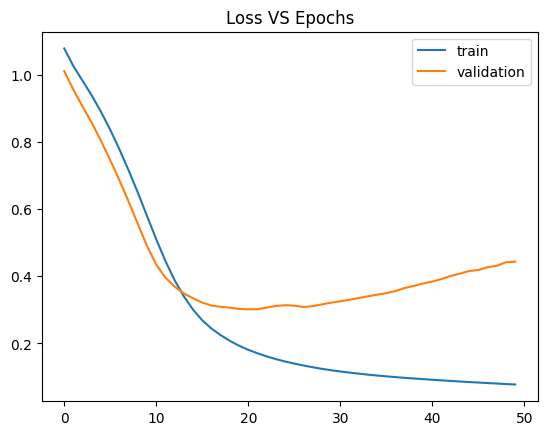

In [92]:
show_plot(history_adam)

In [93]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [95]:
from tensorflow.keras.callbacks import LearningRateScheduler

LRdecay = LearningRateScheduler(scheduler)

model_adam = create_baseline()

model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy())

history_adam_with_lr_decay = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50,
                         callbacks=[LRdecay],
                         batch_size=128, verbose = 0)


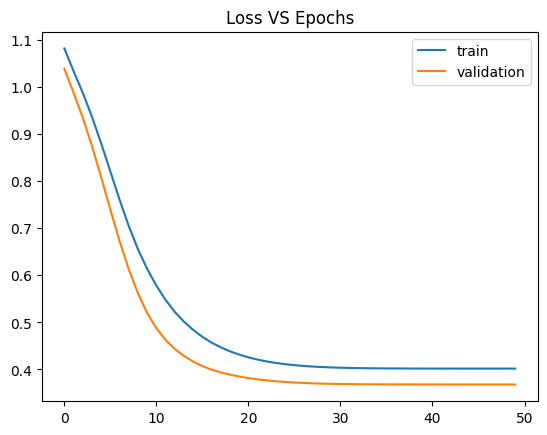

In [96]:
show_plot(history_adam_with_lr_decay)